# Muhammad Hassan

## Music Recommendation

## Task-03 Beginner Level

### Importing libraries

In [90]:
#import all libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from scipy import stats
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
pd.options.mode.chained_assignment = None  # default='warn
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from sklearn import tree
from sklearn.model_selection import GridSearchCV,\
RandomizedSearchCV
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import classification_report

### Reading the dataset

In [92]:
path="C:/Users/Hassan Jutt/Downloads/"
songs_data = pd.read_csv(path+"songs.csv")
songs_info_data =  pd.read_csv(path+"song_extra_info.csv")
train_data = pd.read_csv(path+"train.csv")
test_data = pd.read_csv(path+"test.csv")
members_data = pd.read_csv(path+"members.csv")
sample_submission_data = pd.read_csv(path+"sample_submission.csv")


### Merging data

In [93]:
data = pd.merge(train_data,members_data)
df = pd.merge(songs_data,songs_info_data)
data = pd.merge(data,df)

In [99]:
data.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,1,0,NaN,7,20120102,20171005,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854
1,pouJqjNRmZOnRNzzMWWkamTKkIGHyvhl/jo4HgbncnM=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,discover,Online playlist more,online-playlist,0,15,18,male,4,20151220,20170930,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854
2,xbodnNBaLMyqqI7uFJlvHOKMJaizuWo/BB/YHZICcKo=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-library,1,1,0,NaN,7,20120804,20171004,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854
3,s0ndDsjI79amU0RBiullFN8HRz9HjE++34jGNa7zJ/s=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-library,1,5,21,female,9,20110808,20170917,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854
4,Vw4Umh6/qlsJDC/XMslyAxVvRgFJGHr53yb/nrmY1DU=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-library,0,6,33,female,9,20070323,20170915,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854


In [100]:
data.shape

(7375849, 20)

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7375849 entries, 0 to 7375848
Data columns (total 20 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   msno                    object 
 1   song_id                 object 
 2   source_system_tab       object 
 3   source_screen_name      object 
 4   source_type             object 
 5   target                  int64  
 6   city                    int64  
 7   bd                      int64  
 8   gender                  object 
 9   registered_via          int64  
 10  registration_init_time  int64  
 11  expiration_date         int64  
 12  song_length             int64  
 13  genre_ids               object 
 14  artist_name             object 
 15  composer                object 
 16  lyricist                object 
 17  language                float64
 18  name                    object 
 19  isrc                    object 
dtypes: float64(1), int64(7), object(12)
memory usage: 1.2+ GB


In [102]:
data.describe()

,target,city,bd,registered_via,registration_init_time,expiration_date,song_length,language
count,7.375849e+06,7.375849e+06,7.375849e+06,7.375849e+06,7.375849e+06,7.375849e+06,7.375849e+06,7.375813e+06
mean,5.035420e-01,7.511470e+00,1.753920e+01,6.794075e+00,2.012810e+07,2.017157e+07,2.451213e+05,1.860810e+01
std,4.999875e-01,6.641632e+00,2.155224e+01,2.275785e+00,3.017261e+04,3.869916e+03,6.734491e+04,2.117688e+01
min,0.000000e+00,1.000000e+00,-4.300000e+01,3.000000e+00,2.004033e+07,1.970010e+07,1.393000e+03,-1.000000e+00
25%,0.000000e+00,1.000000e+00,0.000000e+00,4.000000e+00,2.011070e+07,2.017091e+07,2.147260e+05,3.000000e+00
50%,1.000000e+00,5.000000e+00,2.100000e+01,7.000000e+00,2.013102e+07,2.017093e+07,2.418120e+05,3.000000e+00
75%,1.000000e+00,1.300000e+01,2.900000e+01,9.000000e+00,2.015102e+07,2.017101e+07,2.721690e+05,5.200000e+01
max,1.000000e+00,2.200000e+01,1.051000e+03,1.300000e+01,2.017013e+07,2.020102e+07,1.085171e+07,5.900000e+01


### checking missing values

In [105]:
data.isnull().sum()

msno                            0
song_id                         0
source_system_tab           24843
source_screen_name         414701
source_type                 21535
target                          0
city                            0
bd                              0
gender                    2960803
registered_via                  0
registration_init_time          0
expiration_date                 0
song_length                     0
genre_ids                  118337
artist_name                     0
composer                  1675125
lyricist                  3177973
language                       36
name                            2
isrc                       576394
dtype: int64

In [106]:
#percent of missing value in each coloumn
print("Percentage of Missing values for each coloumn")
percent_missing = data.isnull().sum() * 100 / len(data)
print(percent_missing)

Percentage of Missing values for each coloumn
msno                       0.000000
song_id                    0.000000
source_system_tab          0.336815
source_screen_name         5.622417
source_type                0.291966
target                     0.000000
city                       0.000000
bd                         0.000000
gender                    40.141860
registered_via             0.000000
registration_init_time     0.000000
expiration_date            0.000000
song_length                0.000000
genre_ids                  1.604385
artist_name                0.000000
composer                  22.710945
lyricist                  43.086199
language                   0.000488
name                       0.000027
isrc                       7.814612
dtype: float64


In [107]:
#removing missing value from coloumns having less than 1%
data = data[(data.name.notna()) & (data.language.notna()) & (data.source_type.notna()) & (data.source_system_tab.notna())]

In [108]:
data.isnull().sum()

msno                            0
song_id                         0
source_system_tab               0
source_screen_name         389837
source_type                     0
target                          0
city                            0
bd                              0
gender                    2950908
registered_via                  0
registration_init_time          0
expiration_date                 0
song_length                     0
genre_ids                  117911
artist_name                     0
composer                  1669225
lyricist                  3166649
language                        0
name                            0
isrc                       574302
dtype: int64

In [109]:
#imputing genre_ids coloumn on the basis of Last observation carried forward (LOCF) method.
data["genre_ids"] = data["genre_ids"].fillna(method='ffill')

In [110]:
#imputing unknown value for rest of the missing values in data
impute_constant = SimpleImputer(strategy='constant', fill_value='unknown')
#coloumns in which the value is to be imputed
impute_cols = ['lyricist', 'gender', 'composer', 'isrc', 'source_screen_name']
data[impute_cols] = impute_constant.fit_transform(data[impute_cols])

In [111]:
#total missing values in the dataset
data.isnull().sum().sum()

0

### EDA

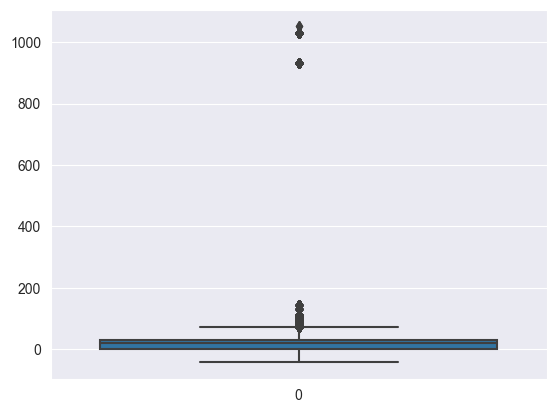

In [112]:
sns.boxplot(data['bd']);

In [113]:
q_low = data['bd'].quantile(0.01)
q_hi  = data['bd'].quantile(0.99)

df_filtered = data[(data['bd'] < q_hi) & (data['bd'] > q_low)]

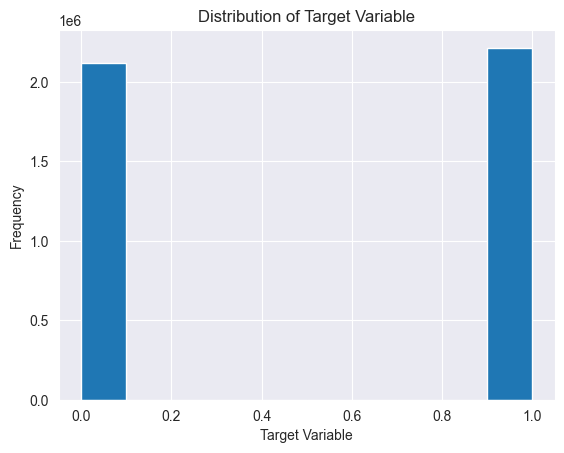

In [114]:
plt.hist(df_filtered['target'], bins=10)  # Adjust the number of bins as needed
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')
plt.show()

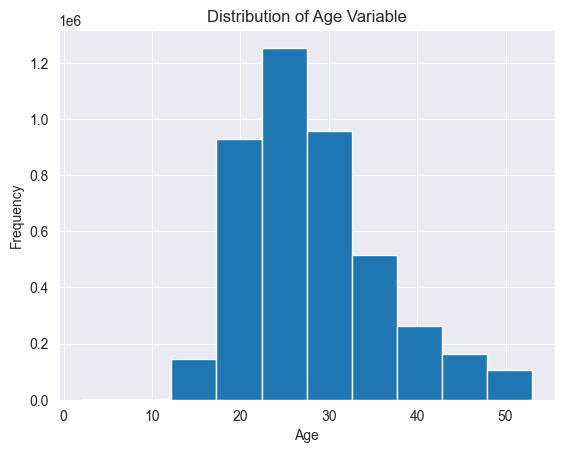

In [115]:
plt.hist(df_filtered['bd'], bins=10)  # Adjust the number of bins as needed
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age Variable')
plt.show()

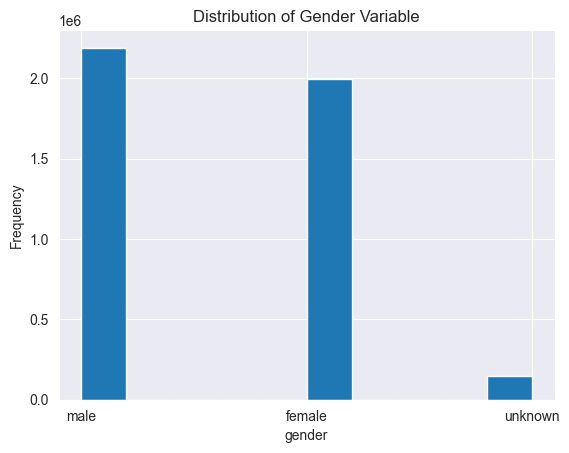

In [116]:
plt.hist(df_filtered['gender'], bins=10)  # Adjust the number of bins as needed
plt.xlabel('gender')
plt.ylabel('Frequency')
plt.title('Distribution of Gender Variable')
plt.show()

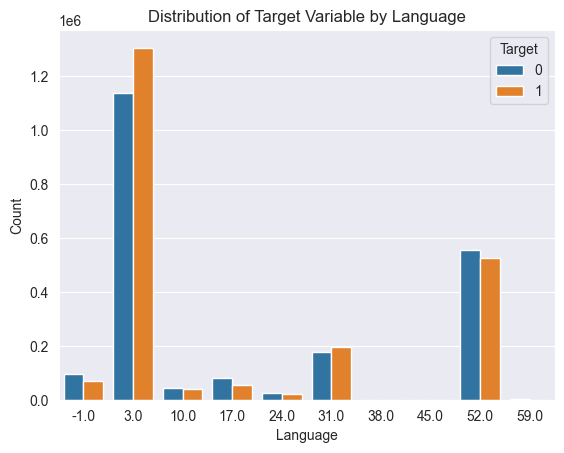

In [117]:
# Plot the count plot of 'language' vs 'target'
sns.countplot(data=df_filtered, x='language', hue='target')
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Distribution of Target Variable by Language')
plt.legend(title='Target')
plt.show()

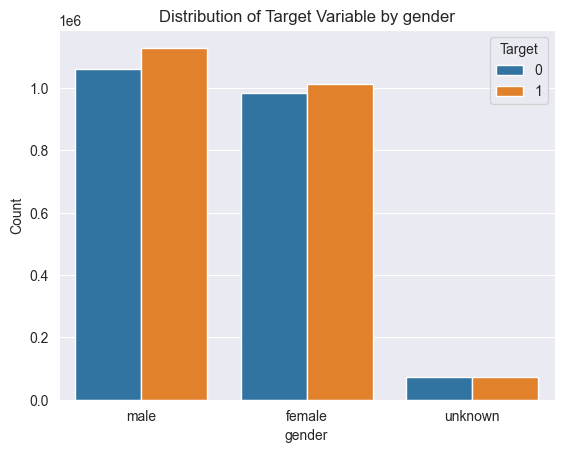

In [118]:
# Plot the count plot of 'gender' vs 'target'
sns.countplot(data=df_filtered, x='gender', hue='target')
plt.xlabel('gender')
plt.ylabel('Count')
plt.title('Distribution of Target Variable by gender')
plt.legend(title='Target')
plt.show()

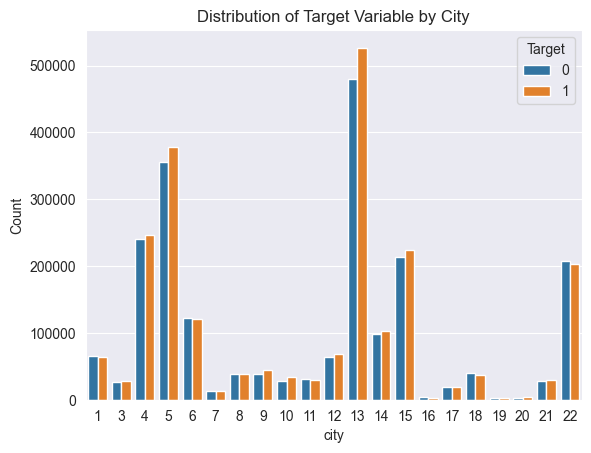

In [119]:
# Plot the count plot of 'city' vs 'target'
sns.countplot(data=df_filtered, x='city', hue='target')
plt.xlabel('city')
plt.ylabel('Count')
plt.title('Distribution of Target Variable by City')
plt.legend(title='Target')
plt.show()

C:\Users\Hassan Jutt\AppData\Local\Temp\ipykernel_5648\1613679258.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_filtered.corr(),cmap="magma")


<Axes: >

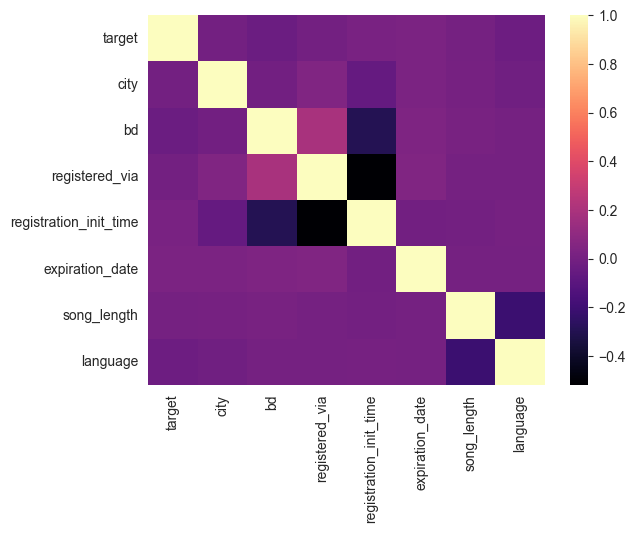

In [120]:
sns.heatmap(df_filtered.corr(),cmap="magma")

### Data Preprocessing and Feature Engineering

In [136]:
df_reduced_memory = reduce_mem_usage(df_filtered)

Memory usage of dataframe is 452.48 MB


TypeError: Categorical is not ordered for operation min
you can use .as_ordered() to change the Categorical to an ordered one


In [137]:
df_reduced_memory.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,...,isrc,genre_ids_label_encoded,artist_name_label_encoded,composer_label_encoded,lyricist_label_encoded,name_label_encoded,city_label_encoded,gender_label_encoded,registered_via_label_encoded,language_label_encoded
1,pouJqjNRmZOnRNzzMWWkamTKkIGHyvhl/jo4HgbncnM=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,discover,Online playlist more,online-playlist,0,15,18,male,4,...,GBUM71602854,263,2567,11653,18918,39128,13,1,1,8
3,s0ndDsjI79amU0RBiullFN8HRz9HjE++34jGNa7zJ/s=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-library,1,5,21,female,9,...,GBUM71602854,263,2567,11653,18918,39128,3,0,3,8
4,Vw4Umh6/qlsJDC/XMslyAxVvRgFJGHr53yb/nrmY1DU=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-library,0,6,33,female,9,...,GBUM71602854,263,2567,11653,18918,39128,4,0,3,8
5,YqtKhiDOFJ/gdd2V4AFdnVwGMMaA0yUEbb8w7xuoP7I=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,discover,Discover Chart,online-playlist,0,5,23,female,9,...,GBUM71602854,263,2567,11653,18918,39128,3,0,3,8
6,jGiECz8y+oKS0tDcZArJXK2ZQisBpk/OC3wh4kvs8gc=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,discover,Online playlist more,song-based-playlist,1,5,27,female,9,...,GBUM71602854,263,2567,11653,18918,39128,3,0,3,8


In [135]:

def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [138]:
## Encoding Categorical Data
# Define your categorical columns to encode
categorical_columns = [ 'genre_ids', 'artist_name', 'composer',
        'lyricist', 'name', 'city', 'gender', 'registered_via', 'language']

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each categorical column and apply label encoding
for column in categorical_columns:
    df_reduced_memory[column + '_label_encoded'] = label_encoder.fit_transform(df_reduced_memory[column])

In [139]:
categorical_columns = ['msno', 'song_id','source_type']

encoder = TargetEncoder(smoothing=0.5)
for elem in categorical_columns:
     df_reduced_memory[elem+'_encoding'] = encoder.fit_transform(df_reduced_memory[elem], df_reduced_memory['target'])

In [140]:
df_reduced_memory.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,...,composer_label_encoded,lyricist_label_encoded,name_label_encoded,city_label_encoded,gender_label_encoded,registered_via_label_encoded,language_label_encoded,msno_encoding,song_id_encoding,source_type_encoding
1,pouJqjNRmZOnRNzzMWWkamTKkIGHyvhl/jo4HgbncnM=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,discover,Online playlist more,online-playlist,0,15,18,male,4,...,11653,18918,39128,13,1,1,8,0.505348,0.461538,0.438807
3,s0ndDsjI79amU0RBiullFN8HRz9HjE++34jGNa7zJ/s=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-library,1,5,21,female,9,...,11653,18918,39128,3,0,3,8,0.894052,0.461538,0.625698
4,Vw4Umh6/qlsJDC/XMslyAxVvRgFJGHr53yb/nrmY1DU=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-library,0,6,33,female,9,...,11653,18918,39128,4,0,3,8,0.231068,0.461538,0.625698
5,YqtKhiDOFJ/gdd2V4AFdnVwGMMaA0yUEbb8w7xuoP7I=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,discover,Discover Chart,online-playlist,0,5,23,female,9,...,11653,18918,39128,3,0,3,8,0.615032,0.461538,0.438807
6,jGiECz8y+oKS0tDcZArJXK2ZQisBpk/OC3wh4kvs8gc=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,discover,Online playlist more,song-based-playlist,1,5,27,female,9,...,11653,18918,39128,3,0,3,8,0.472306,0.461538,0.383312


In [141]:
# removing unnecessary columns

df_reduced_memory = df_reduced_memory.drop(['msno', 'song_id','registered_via','city','language','gender','artist_name','composer','lyricist','name'], axis=1)
df_reduced_memory = df_reduced_memory.drop(['source_system_tab','source_screen_name','source_type','isrc'],axis =1)
df_reduced_memory = df_reduced_memory.drop(['genre_ids'],axis =1)

In [142]:
# Convert 'registration_init_time' column to string
df_reduced_memory.registration_init_time = df_reduced_memory.registration_init_time.astype('str')

# Reformat 'registration_init_time' as YYYY-MM-DD
df_reduced_memory.registration_init_time = df_reduced_memory.registration_init_time.apply(lambda x: x[:4] + '-' + x[4:6] + '-' + x[6:8])

# Convert 'registration_init_time' to datetime
df_reduced_memory.registration_init_time = pd.to_datetime(df_reduced_memory.registration_init_time)

# Extract month, day of the week, year, and day from 'registration_init_time'
df_reduced_memory['reg_month'] = df_reduced_memory.registration_init_time.dt.month
df_reduced_memory['reg_dayofweek'] = df_reduced_memory.registration_init_time.dt.weekday
df_reduced_memory['reg_year'] = df_reduced_memory.registration_init_time.dt.year
df_reduced_memory['reg_day'] = df_reduced_memory.registration_init_time.dt.day

# Convert 'expiration_date' column to string
df_reduced_memory.expiration_date = df_reduced_memory.expiration_date.astype('str')

# Reformat 'expiration_date' as YYYY-MM-DD
df_reduced_memory.expiration_date = df_reduced_memory.expiration_date.apply(lambda x: x[:4] + '-' + x[4:6] + '-' + x[6:8])

# Convert 'expiration_date' to datetime
df_reduced_memory.expiration_date = pd.to_datetime(df_reduced_memory.expiration_date)

# Calculate the difference in days between 'expiration_date' and 'registration_init_time'
df_reduced_memory['reg_diff'] = df_reduced_memory.apply(lambda x: (x.expiration_date - x.registration_init_time).days, axis=1)

# Drop unnecessary columns 'expiration_date' and 'registration_init_time'
df_reduced_memory = df_reduced_memory.drop(columns=['expiration_date', 'registration_init_time'])


In [143]:
df_reduced_memory.head()

,target,bd,song_length,genre_ids_label_encoded,artist_name_label_encoded,composer_label_encoded,lyricist_label_encoded,name_label_encoded,city_label_encoded,gender_label_encoded,registered_via_label_encoded,language_label_encoded,msno_encoding,song_id_encoding,source_type_encoding,reg_month,reg_dayofweek,reg_year,reg_day,reg_diff
1,0,18,206471,263,2567,11653,18918,39128,13,1,1,8,0.505348,0.461538,0.438807,12,6,2015,20,650
3,1,21,206471,263,2567,11653,18918,39128,3,0,3,8,0.894052,0.461538,0.625698,8,0,2011,8,2232
4,0,33,206471,263,2567,11653,18918,39128,4,0,3,8,0.231068,0.461538,0.625698,3,4,2007,23,3829
5,0,23,206471,263,2567,11653,18918,39128,3,0,3,8,0.615032,0.461538,0.438807,12,1,2014,23,1024
6,1,27,206471,263,2567,11653,18918,39128,3,0,3,8,0.472306,0.461538,0.383312,4,3,2014,24,1385


<Axes: >

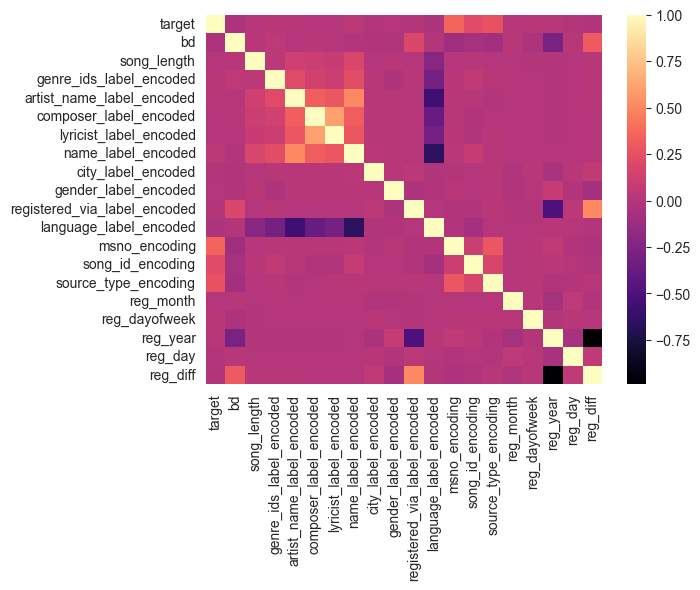

In [144]:
sns.heatmap(df_reduced_memory.corr(),cmap="magma")

### Splitting The Dataset

In [145]:
X = df_reduced_memory.drop(['target'],axis =1)
Y = df_reduced_memory['target']

In [146]:
X.shape

(4335302, 19)

In [147]:
#Testing and training data
X = X.sample(n=117088, random_state=42)
Y = Y.sample(n=117088, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [148]:
print(x_train.shape)
print(y_train.shape)

(93670, 19)
(93670,)


### building the model

### Random Forest

In [151]:
model_rndm = RandomForestClassifier(criterion='entropy', n_estimators=441, n_jobs=6, max_depth=533, min_samples_split=6)
model_rndm.fit(x_train, y_train)
rndm_predict_prob = model_rndm.predict_proba(x_test)[:, 1]
fpr_rndm, tpr_rndm, thresholds = roc_curve(y_test, rndm_predict_prob, pos_label=1)
# Compute the ROC AUC score
roc_auc_rndm = roc_auc_score(y_test, rndm_predict_prob)
roc_auc_rndm

0.7526192965402607

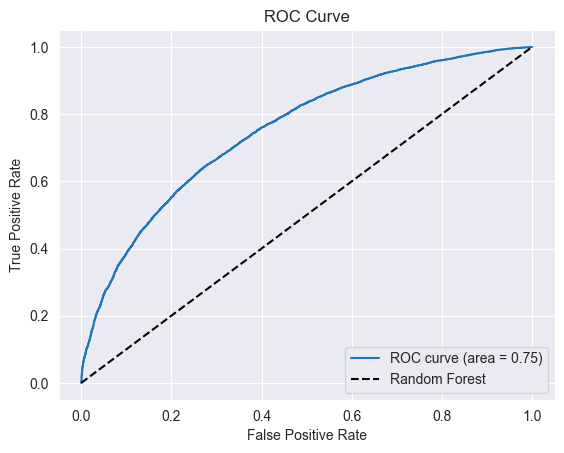

In [152]:
plt.plot(fpr_rndm, tpr_rndm, label='ROC curve (area = %0.2f)' % roc_auc_rndm)
# roc curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### XGBOOST

In [154]:
model_xgb = XGBClassifier()
model_xgb.fit(x_train,y_train)
xgb_predict_prob = model_xgb.predict_proba(x_test)[:, 1]
fpr_xgb, tpr_xgb, thresholds = roc_curve(y_test, xgb_predict_prob, pos_label=1)
# Compute the ROC AUC score
roc_auc_xgb = roc_auc_score(y_test, xgb_predict_prob)
roc_auc_xgb

0.7455026671490259

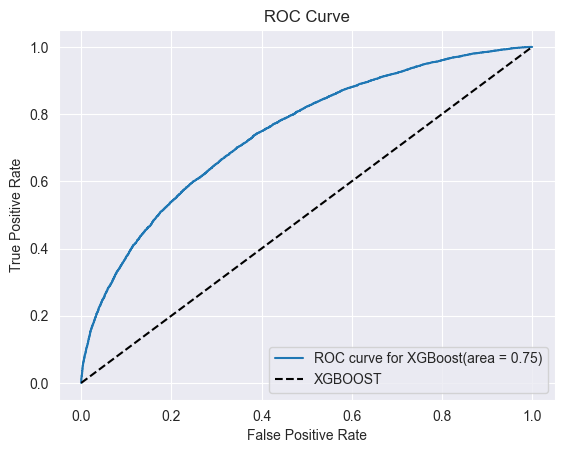

In [155]:
plt.plot(fpr_xgb, tpr_xgb, label='ROC curve for XGBoost(area = %0.2f)' % roc_auc_xgb)
# roc curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='XGBOOST')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### LGBM

In [156]:
model_lgb = lgb.LGBMClassifier(boosting_type='gbdt', n_estimators=600, min_child_samples=1, learning_rate=0.05,
                      reg_alpha=0.0254, reg_lambda=1.8398, colsample_bytree=0.8, subsample=0.8, max_depth=50, num_leaves=562)
model_lgb.fit(x_train, y_train)
lgb_predict_prob = model_lgb.predict_proba(x_test)[:, 1]
fpr_lgb, tpr_lgb, thresholds = roc_curve(y_test, lgb_predict_prob, pos_label=1)
# Compute the ROC AUC score
roc_auc_lgb = roc_auc_score(y_test, lgb_predict_prob)
roc_auc_lgb

[LightGBM] [Info] Number of positive: 47722, number of negative: 45948
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023895 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2369
[LightGBM] [Info] Number of data points in the train set: 93670, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509469 -> initscore=0.037882
[LightGBM] [Info] Start training from score 0.037882


0.753044210122134

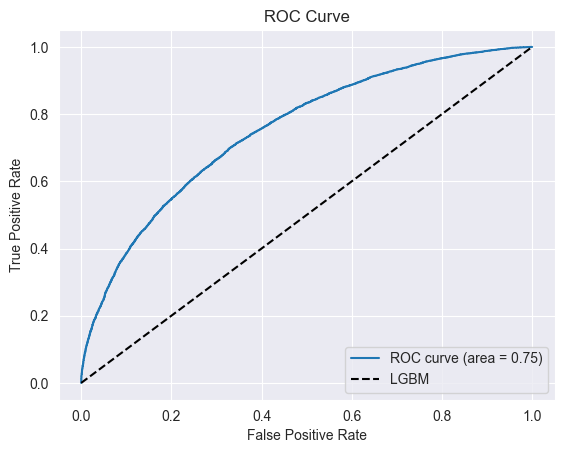

In [157]:
plt.plot(fpr_lgb, tpr_lgb, label='ROC curve (area = %0.2f)' % roc_auc_lgb)
# roc curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='LGBM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()